In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
import operator

In [3]:
summary = pd.read_excel('XYZ-1.xlsx', 'summary')
df = pd.read_excel('XYZ-1.xlsx', 'Data')
demand = df[6:]

In [4]:
summary

,Lead time,starting stock,Probability,Demand_lead,Mean,Std Dev
0,9,2750,0.756831,705,103.501805,37.317994
1,6,22500,1.000000,3891,648.551913,26.447970
2,16,5200,0.702186,2266,201.677043,31.079301
3,22,1400,0.237705,785,150.068965,3.215598


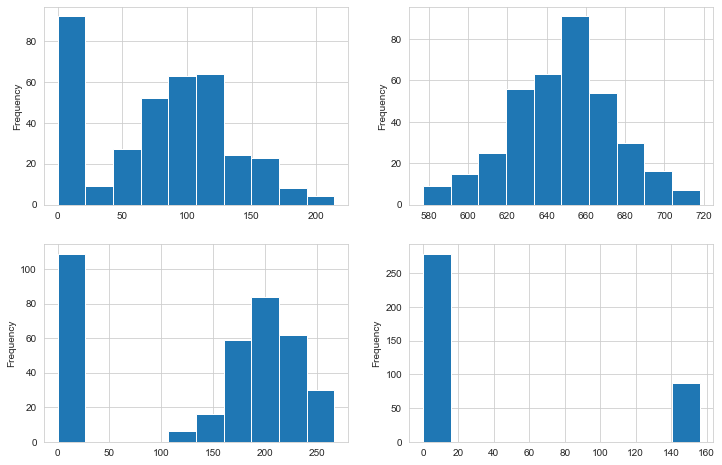

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
demand[1].plot.hist(ax=axes[0, 0])
demand[2].plot.hist(ax=axes[0, 1])
demand[3].plot.hist(ax=axes[1, 0])
demand[4].plot.hist(ax=axes[1, 1])

In [6]:
class Product:
    def __init__(self, i):
        """
        :type i: int - Product number
        """
        self.i = i
        self.lead_time = summary['Lead time'].iloc[i - 1]
        self.probability = summary['Probability'].iloc[i - 1]
        self.starting_stock = summary['starting stock'].iloc[i - 1]
        self.demand_lead = summary['Demand_lead'].iloc[i - 1]

        self.mean = np.mean([np.log(j) for j in demand[demand[i] > 0][i]])
        self.sd = np.std([np.log(j) for j in demand[demand[i] > 0][i]])

In [7]:
def daily_demand(mean, sd, probability):
    random_num = np.random.uniform(0, 1)
    if random_num > probability:
        return 0
    else:
        return np.exp(np.random.normal(mean, sd))

In [8]:
product_1 = Product(1)

In [9]:
def reple(M, product, review_period=30):
    inventory = product.starting_stock
    mean = product.mean
    sd = product.sd
    lead_time = product.lead_time
    probability = product.probability
    demand_lead = product.demand_lead

    q = 0
    stock_out = 0
    counter = 0
    order_placed = False
    # dictionary to store all the information
    data = {'inv_level': [], 'daily_demand': [], 'orders': []}

    for day in range(1, 365):
        day_demand = daily_demand(mean, sd, probability)
        data['daily_demand'].append(day_demand)

        if day % review_period == 0:
            # Placing the order
            q = M - inventory + demand_lead
            order_placed = True
            data['orders'].append(q)
            
            
        if order_placed:
            counter += 1
        
        if counter == lead_time:
            # Restocking day
            inventory += q
            order_placed = False
            counter = 0

        if inventory - day_demand >= 0:
            inventory -= day_demand
        elif inventory - day_demand < 0:
            inventory = 0
            stock_out += 1

        data['inv_level'].append(inventory)

    return data


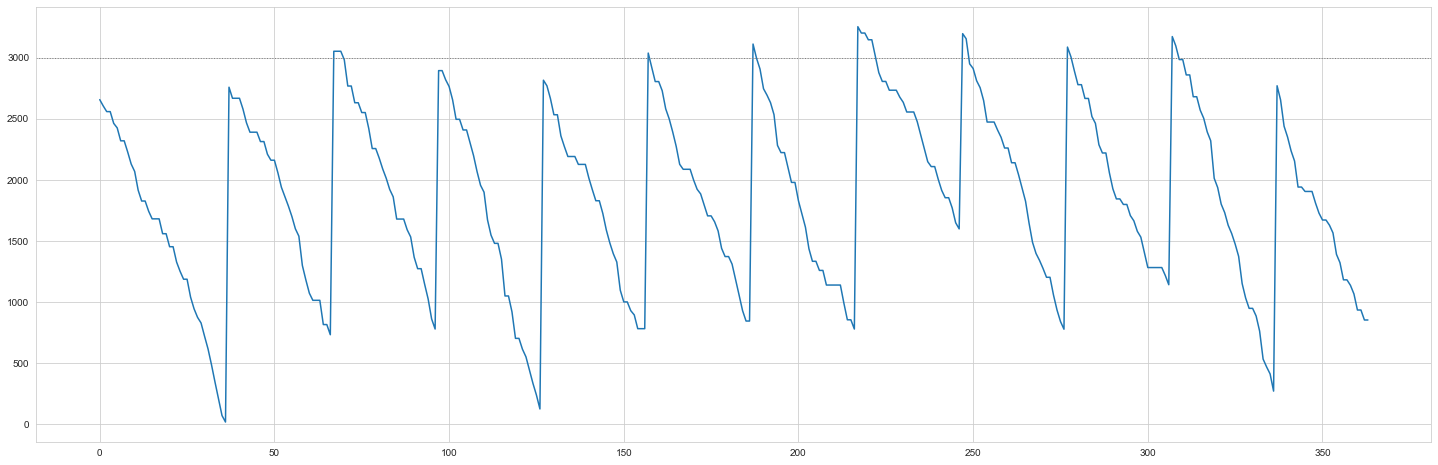

In [10]:
data = reple(3000, product_1)
plt.figure(figsize=(25,8))
plt.plot(data['inv_level'])
plt.axhline(3000, linewidth=1, color="grey", linestyle=":")
plt.show()

In [11]:
print (data['inv_level'])

[2655.781336087719, 2604.3160837895252, 2557.7396325118953, 2557.7396325118953, 2461.602126676023, 2424.6314213497203, 2318.9461795436378, 2318.9461795436378, 2227.520131727186, 2129.271062595967, 2068.339722574197, 1915.04777385823, 1826.539151600276, 1826.539151600276, 1743.310426612367, 1680.7843871631699, 1680.7843871631699, 1680.7843871631699, 1559.1954176218037, 1559.1954176218037, 1452.7336023242626, 1452.7336023242626, 1327.2958991906755, 1251.505677775111, 1187.0464247630023, 1187.0464247630023, 1040.8569013917559, 944.9584184686931, 875.0918914314248, 829.2125365811338, 721.0954068284568, 616.7185229367037, 486.09132577037303, 344.61371575477403, 210.37625324983517, 71.81038155399452, 18.949890068793763, 2757.38584162672, 2666.965230718485, 2666.965230718485, 2666.965230718485, 2578.6429097865116, 2466.5341051924756, 2389.434184449154, 2389.434184449154, 2389.434184449154, 2312.7894247134973, 2312.7894247134973, 2209.401999974862, 2160.201417963227, 2160.201417963227, 2056.88

In [12]:
print (data['orders'])

[2829.9081085685752, 2405.424875869684, 2113.5207886439566, 2785.145126402028, 2377.3934936017604, 2265.455842311809, 2565.6530553321895, 1596.824702741435, 2307.391696300341, 2173.9101998022197, 2671.73373081316, 2568.080619576768]
